## TUGAS PRAKTIKUM MACHINE LEARNING
### Nabila Lailatanzila - 1227050100


--------------------------------------

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Memuat Dataset Lokal

In [2]:
df = pd.read_csv('cars.csv')

Menmapilkan Dataset

In [3]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


Mengecek Info Statistik

In [4]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


Mengecek Sebaran Data

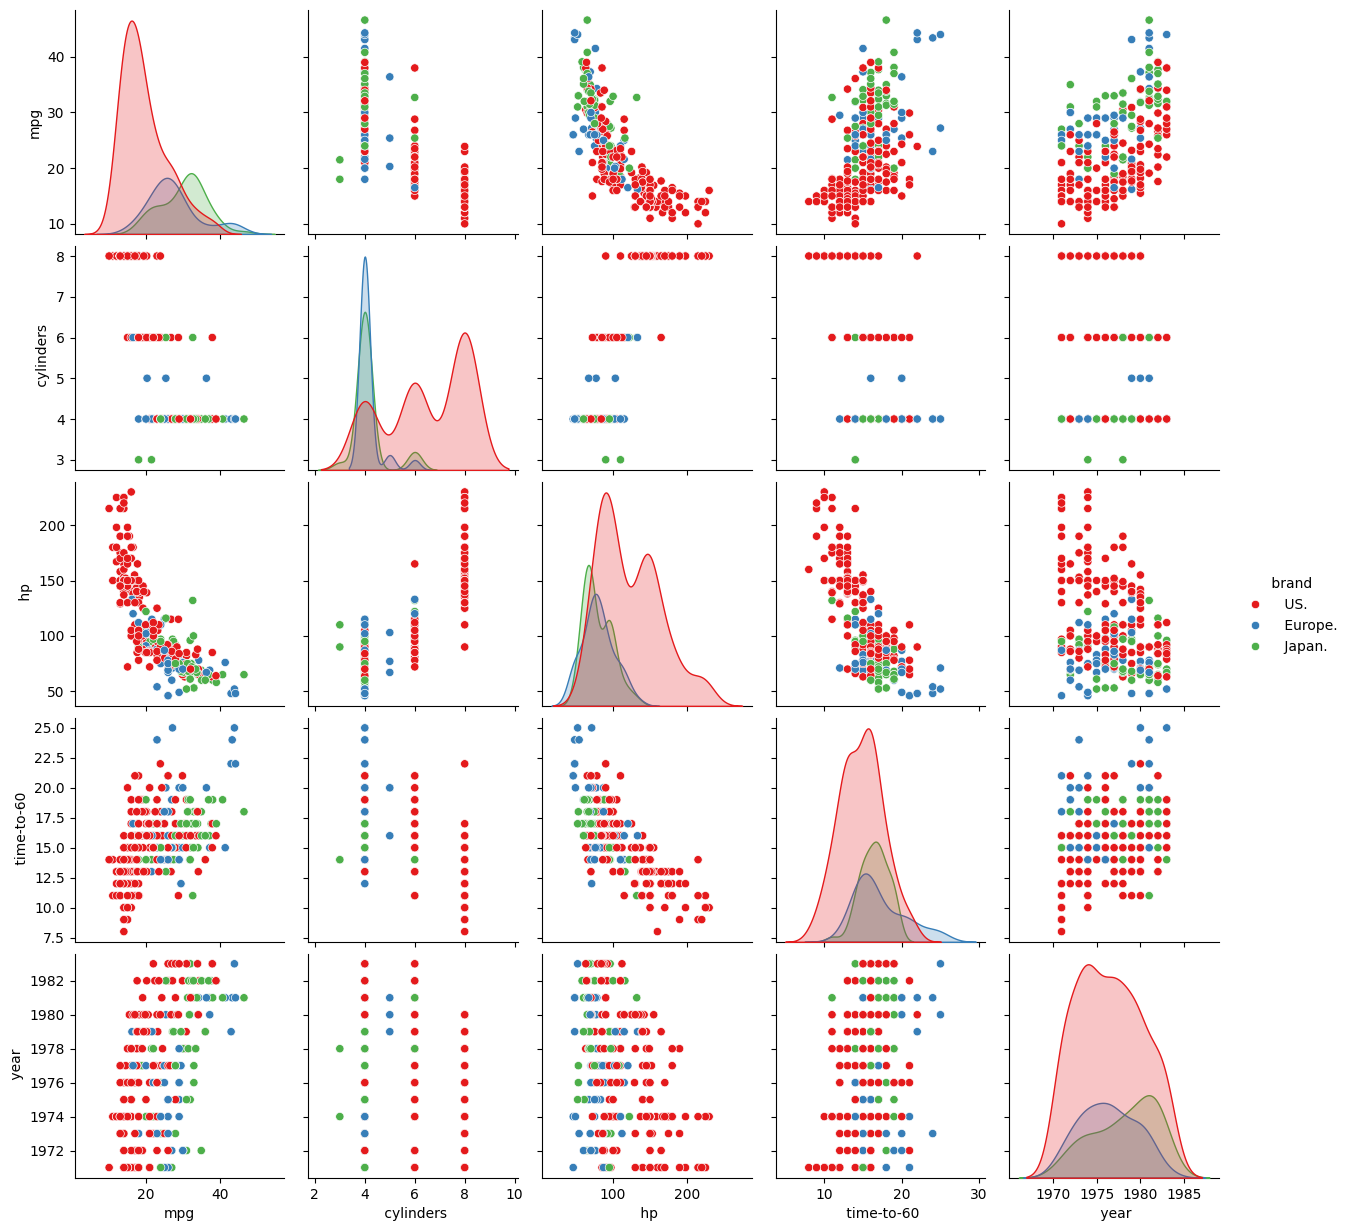

In [5]:
sns.pairplot(df, hue=' brand', palette='Set1')
plt.show()

Memisahkan Fitur dan Target

In [6]:
x = df.select_dtypes(include='number')
y = df[' brand']

Split Dataset

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

Melatih Model

In [8]:
model = DecisionTreeClassifier(random_state=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


Evaluasi Model

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Europe.       0.60      0.25      0.35        12
      Japan.       0.45      0.69      0.55        13
         US.       0.81      0.81      0.81        54

    accuracy                           0.71        79
   macro avg       0.62      0.59      0.57        79
weighted avg       0.72      0.71      0.70        79



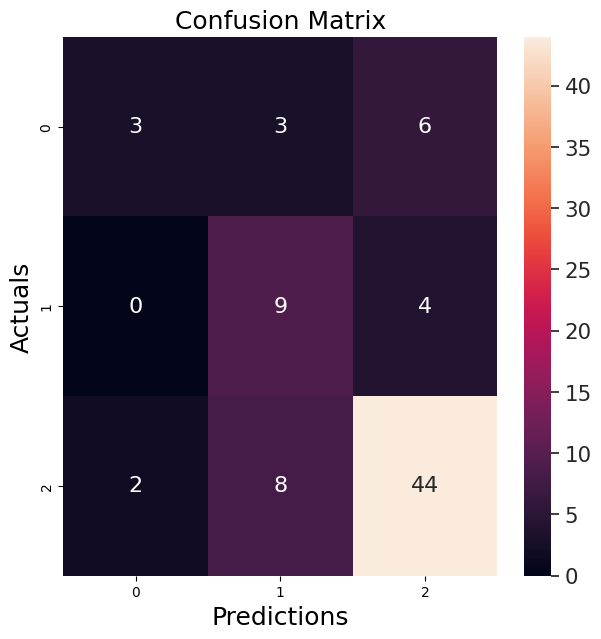

In [10]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4)
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Visualisasi

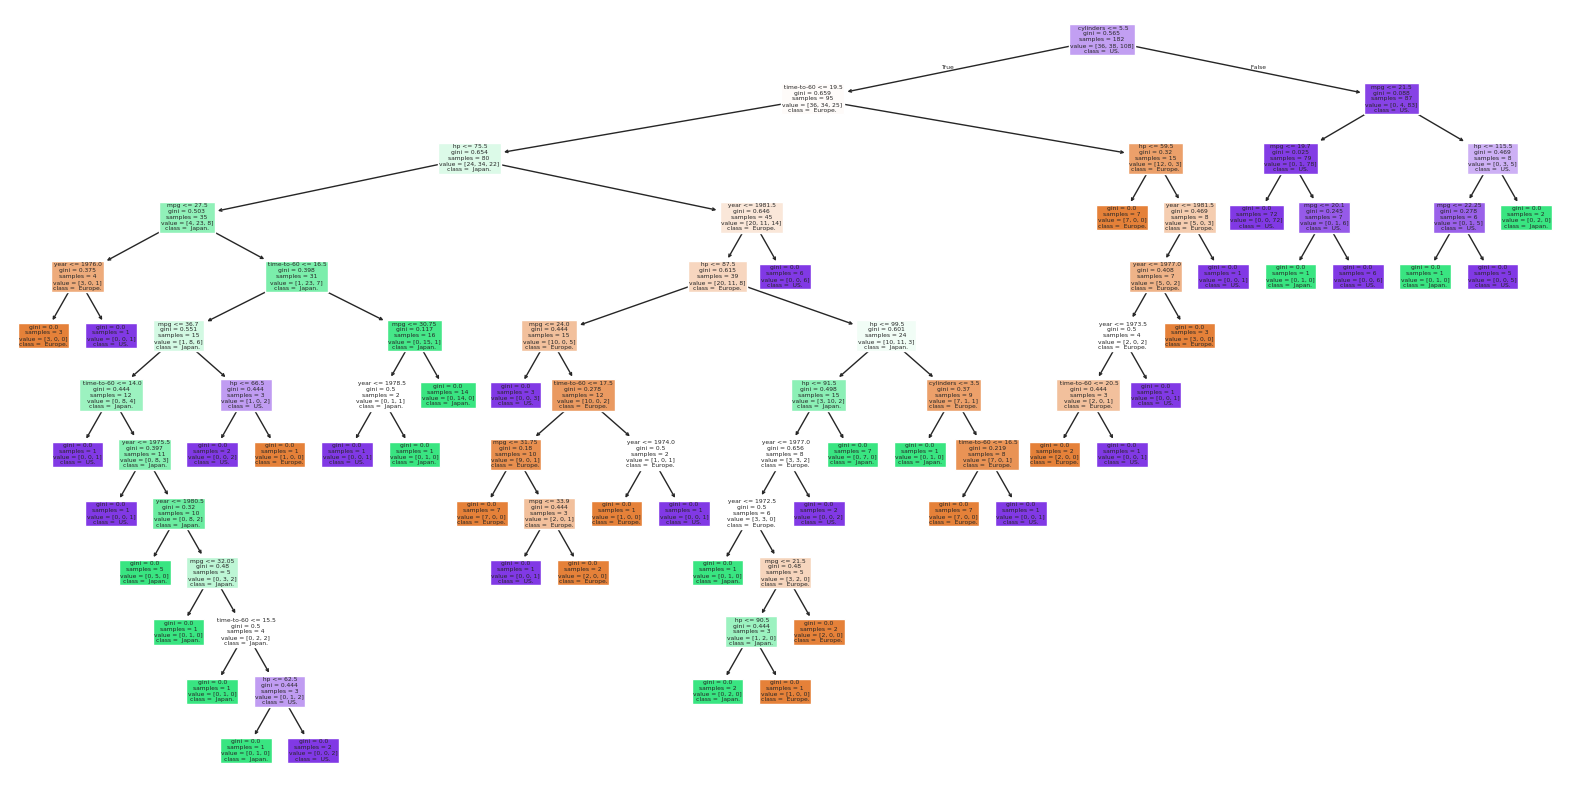

In [11]:
features = x.columns.tolist()
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(model, feature_names=features, class_names=model.classes_, filled=True)
plt.show()